In [17]:
from google.colab import files
uploaded = files.upload()



Saving final_dataset.zip to final_dataset.zip


In [18]:
import zipfile

with zipfile.ZipFile("final_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os


In [20]:
data_path = "/content/final_dataset"

img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

train_data.class_indices


Found 6203 images belonging to 4 classes.
Found 1549 images belonging to 4 classes.


{'improper': 0, 'proper': 1, 'with_mask': 2, 'without_mask': 3}

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.8599 - loss: 0.4575 - val_accuracy: 0.8651 - val_loss: 0.3979
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.8924 - loss: 0.3447 - val_accuracy: 0.9064 - val_loss: 0.3173
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9040 - loss: 0.2984 - val_accuracy: 0.9135 - val_loss: 0.2833
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9158 - loss: 0.2587 - val_accuracy: 0.9290 - val_loss: 0.2373
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9366 - loss: 0.2085 - val_accuracy: 0.9232 - val_loss: 0.2611
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9416 - loss: 0.1737 - val_accuracy: 0.9335 - val_loss: 0.2469
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9530 - loss: 0.1420 - val_accuracy: 0.9270 - val_loss: 0.2866
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9613 - loss: 0.1110 - val_accu

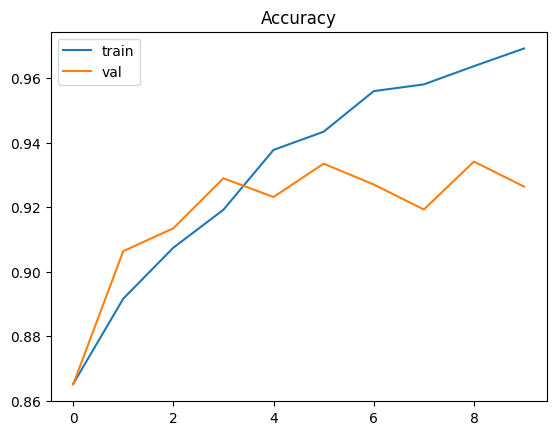

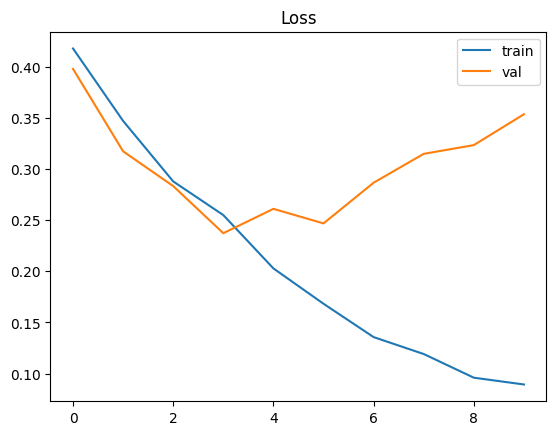

In [24]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["train", "val"])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["train", "val"])
plt.show()


In [25]:
val_loss, val_acc = model.evaluate(val_data)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)


49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 474ms/step - accuracy: 0.9298 - loss: 0.3380
Validation Accuracy: 0.9264041185379028
Validation Loss: 0.3535327613353729


49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 446ms/step


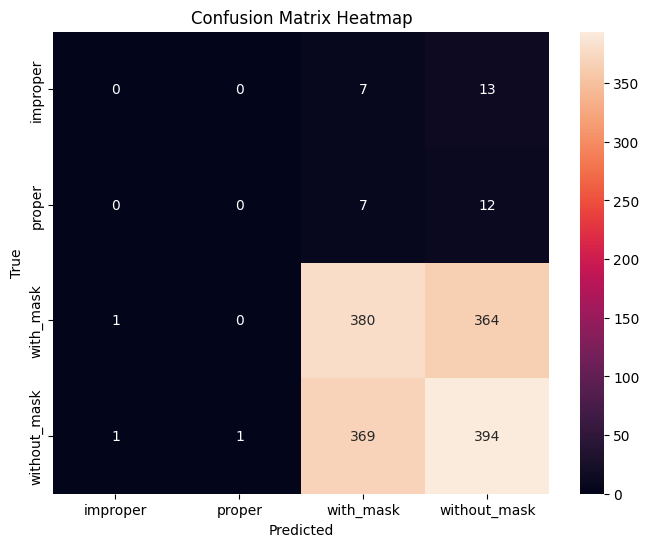

In [26]:
val_data.reset()

predictions = model.predict(val_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_data.classes
labels = list(val_data.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [27]:
print(classification_report(true_classes, predicted_classes, target_names=labels))


              precision    recall  f1-score   support

    improper       0.00      0.00      0.00        20
      proper       0.00      0.00      0.00        19
   with_mask       0.50      0.51      0.50       745
without_mask       0.50      0.52      0.51       765

    accuracy                           0.50      1549
   macro avg       0.25      0.26      0.25      1549
weighted avg       0.49      0.50      0.49      1549



In [28]:
model.save("mask_model_4class.h5")
